In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_finetune.csv
Data_files = ["/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_zeroshot.csv",
                 "/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_finetune.csv",
                 "/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_finetune_ignore_S.csv",
                 "/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_fewshot.csv",
                 "/scratch.global/csci8523_group_7/ttm_finetuned_models/temp/lat_lon_errors_finetune_ignore_non_S.csv"]
Prob_Name = ["zeroshot MSE Values based on Location", 
             "Finetune MSE Values based on Location",
             "Finetune not on supierior MSE Values based on Location",
             "Fewshot MSE Values based on Location",
             "Finetune on supierior MSE Values based on Location",
             ]
data_frames = [pd.read_csv(file_name) for file_name in Data_files]
data_frames = [df.rename(columns = {"Error": "Loss"}) for df in data_frames]

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import Normalize
def plot_loss_map(df, title):
    """
    Plots a map with colored squares representing loss values for given latitudes and longitudes.

    Parameters:
        df (pd.DataFrame): DataFrame with columns 'Longitude', 'Latitude', and 'Loss'.
    """
    # Define the square size for each point
    square_size = 0.35

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Normalize the loss values for color mapping
    norm = Normalize(vmin=df["Loss"].min(), vmax=df["Loss"].max())

    # Create a dense map by drawing squares
    for _, row in df.iterrows():
        rectangle = patches.Rectangle(
            (row["Longitude"], row["Latitude"]),
            square_size,
            -square_size,
            color=plt.cm.viridis(norm(row["Loss"])),
            linewidth=2
        )
        ax.add_patch(rectangle)

    # Add colorbar explicitly linked to the ScalarMappable
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label="Mean Squared Error Loss")

    # Set axis limits to match data range
    ax.set_xlim((-93, -75))  # Example longitude range
    ax.set_ylim((40, 50))    # Example latitude range

    # Plot settings
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    ax.grid(True)

    # Show the plot
    plt.show()

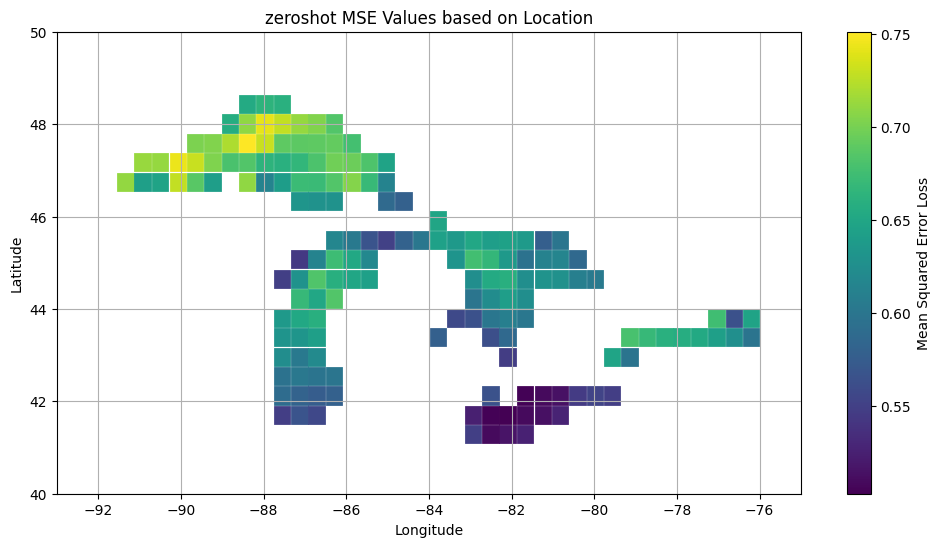

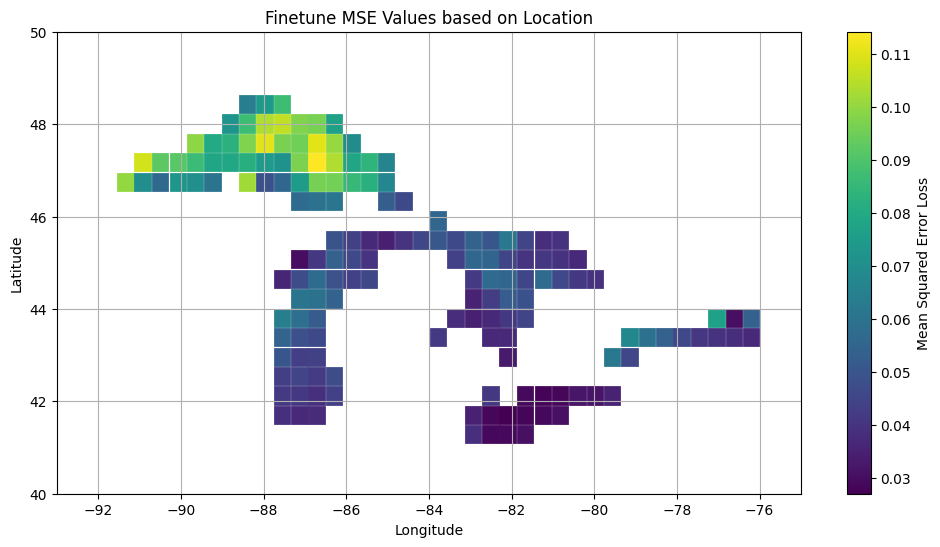

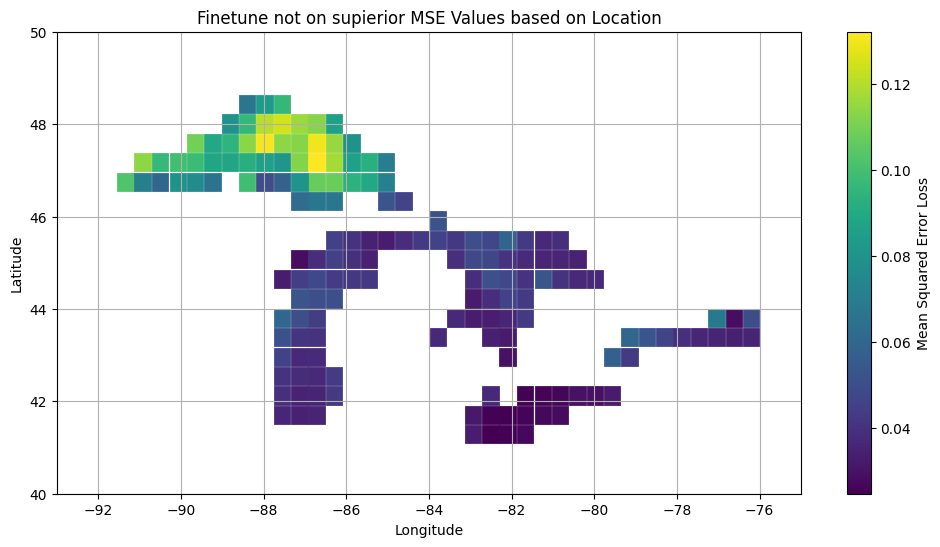

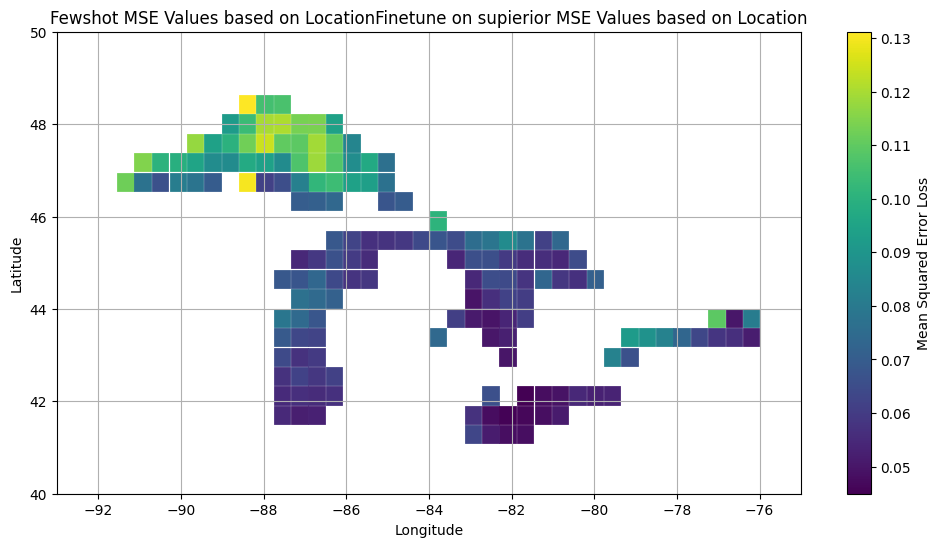

In [4]:
for name, df in zip(Prob_Name, data_frames):
    plot_loss_map(df, name)


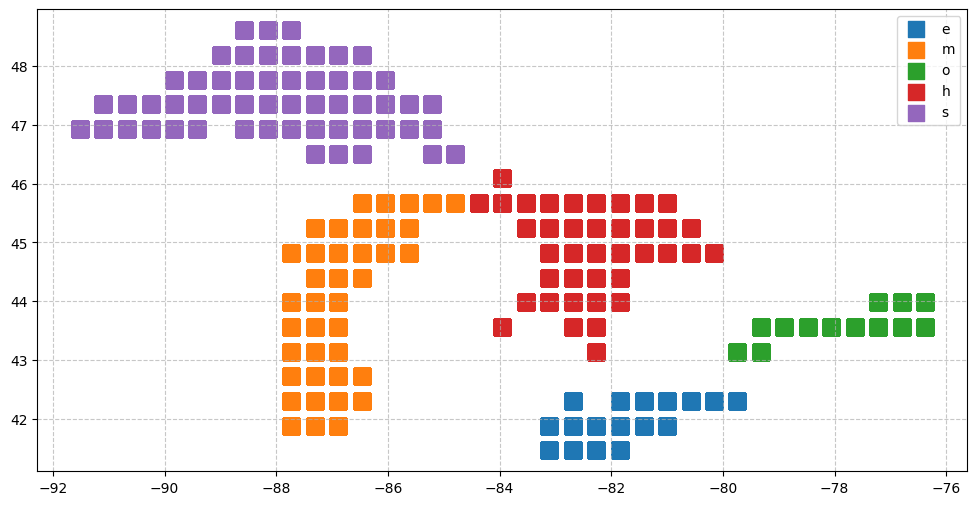

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

DATA_Path ="/scratch.global/csci8523_group_7/combined_data_w_lakes.csv"

data = pd.read_csv(DATA_Path)

fig, ax = plt.subplots(figsize=(12, 6))

unique_lakes = data['Lake'].unique()

for lake in unique_lakes:
    if pd.isna(lake):
        lake_data = data[data['Lake'].isna()]
    else:
        lake_data = data[data['Lake'] == lake]

    ax.scatter(lake_data['Lon'], lake_data['Lat'], 
                s=120, 
                label=lake, 
                marker='s')

ax.legend()

ax.grid(True, linestyle='--', alpha=0.7)

In [6]:
import pandas as pd
import glob
import os

# Define the input folder and output file
input_directory = "/scratch.global/csci8523_group_7/sst_ml_data/"
output_file = "combined_sst_data.csv, 

# Initialize an empty DataFrame for the combined data
combined_df = pd.DataFrame()

# Process all.csv, files in the directory
for file_path in glob.glob(os.path.join(input_directory, "*.csv, )):
    print(file_path)
    # Extract latitude and longitude from the file name
    file_name = os.path.basename(file_path)
    lat, lon = map(float, file_name.replace(".csv, , "").split("_")[1:])
    
    # Load the.csv, and add Lat and Lon columns
    df = pd.read.csv, file_path)
    df["Lat"] = lat
    df["Lon"] = lon
    
    # Append to the combined DataFrame
    #combined_df = pd.concat([combined_df, df], ignore_index=True)

# Save the combined DataFrame
#combined_df.to.csv, output_file, index=False)

print(f"Combined.csv, saved to {output_file}")

SyntaxError: EOL while scanning string literal (2358685550.py, line 7)